In [2]:
import pandas as pd
import webvtt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

%matplotlib inline

### Loading CSV with the timestamps and prediction probabilities

In [3]:
filename = 'Barack Obama\'s final speech as president – video highlights.webm_clipsize1000_predictions.csv'

df = pd.read_csv(filename)

df['timestamp'] = pd.to_timedelta(df['timestamp'])

df = df.sort_values(by='timestamp').reset_index().drop('index', axis=1)

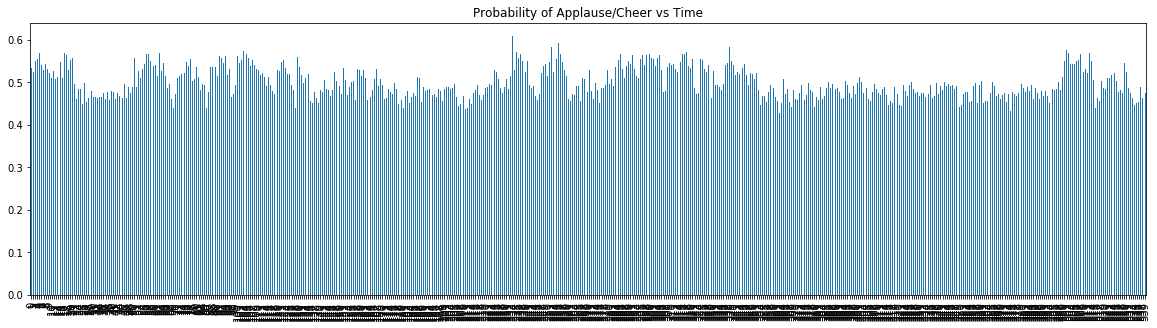

In [6]:
df = df.sort_values(by='timestamp')
df['timestamp_sec'] = df['timestamp'].dt.total_seconds()

df['prediction'].plot(x='timestamp_sec', kind='bar', figsize=(20,5))
plt.title('Probability of Applause/Cheer vs Time');

### Create new columns for peer-based relative percentile (e.g. probability at timestamp X:XX is within the 75th percentile of probabilities)

In [7]:
start = 0.6
end = 1
for i in np.linspace(start, end, num=1+int((end-start)/0.05))[:-1]:
    name = f'{round(i, 2):.2f}'

    df[name] = df['prediction'].apply(lambda x: 1 if x >= df['prediction'].quantile(round(i,2)) else 0)

In [9]:
df[df['0.75']==1][['timestamp_sec', '0.75', 'prediction']].head()

,timestamp_sec,0.75,prediction
0,0.0,1,0.533033
2,1.0,1,0.550475
3,1.5,1,0.554168
4,2.0,1,0.568925
5,2.5,1,0.540498


### TODO - Find sentences said before applause

In [10]:
start = []
end = []
text = []
for caption in webvtt.read('Barack Obama\'s final speech as president – video highlights.en.vtt'):
    start.append(caption.start)
    end.append(caption.end)
    text.append(caption.text)
subtitle_df = pd.DataFrame({'start': start, 'end': end, 'text': text})
subtitle_df['start'] = pd.to_timedelta(subtitle_df['start'])
subtitle_df['end'] = pd.to_timedelta(subtitle_df['end'])

In [11]:
subtitle_df.head()

,start,end,text
0,00:00:00.560000,00:00:10.740000,\nhello Scavo it's good to be home
1,00:00:10.740000,00:00:10.750000,\n
2,00:00:10.750000,00:00:14.360000,\nif I had told you eight years ago that
3,00:00:14.360000,00:00:14.370000,if I had told you eight years ago that\n
4,00:00:14.370000,00:00:17.540000,if I had told you eight years ago that\nAmeric...


If the subtitle is auto-generated by youtube, there is a lot of overlapping of text between timestamps.